# Cryptography

## What is cryptography? 

Cryptography is the art and science of securing information through the use of ciphers to change plain text information into cipher text information. Good ciphers are difficult to "crack" and prevent individuals who are not supposed to read, hear, or see information from doing so. 

Take for example the Caeser cipher, which is one of the earliest recorded ciphers in human history. The Caeser cipher is a *shift* cipher, meaning it shifts the position of a character in a plain text message. Let's examine the example below: 

**plain text: cat**
**shift: 8**
**cipher text: kib**

*How did we get the word **kib** from **cat**?

Think about the fact that **c** is the 3rd letter in the alphabet. If we add our shift value to three, we get 11. 

**General Example**

plain text<sub>position in alphabet</sub> + shift value = cipher text<sub>position in alphabet</sub>

**Specific Example**

8 + 3 = 11

____


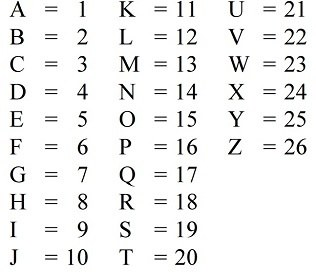

## Cryptography and Computers

Let's imagine we want to pass a message to friend, but we don't want anyone else to be able to read and understand it. This would take a <i>long</i> time to do by hand. Let's practice using Python to help us to do this more quickly. Although this is very different than how WhatsApp or iMessage encrypt our messages, the practice of using numbers and math to make our messages unreadable by anyone other than who we sent the message to is the same core practice across our activities today and your own cell phones!

**Shift Cipher using Python**

In [ ]:
msg = input("Type your message here: ") ##Input the plain text message as a string

shift = int(input("Enter your shift key here: ")) ##Input the shift key as a string, use int function to convert string to integer

output = "" ##Declare the variable output as an empty string

for l in msg: ##Iterate through all the characters in the plain text message
  c = ord(l) + shift ##Calculate a value for each character equal to its numerical Unicode value plus the 
  output += (chr(c)) ##Append the character of the resulting Unicode value from the above step to the output string

print(output) ##Print the output string

## What do you notice? 
## Did you expect the answer that you received? 

Many times when we code, we are trying to solve a problem -- but simply coding the way in which we would solve the problem by hand is not <i>always</i> the best way to solve the problem. 

Here we called the native Python function **ord** (Line 5). This function returns the Unicode value of the input character. In the same line the function is called, we applied the shift value we declared in Line 2. We use the variable <b>c</b> to pass the calculated Unicode value of the original character plus the shift to Line 6. 

In Line 6, we append the new Unicode character corresponding to the value of the variable <b>c</b> to the variable <b>output</b>. 

In Line 7, we print the value of the variable <b>output</b>

**What is Unicode?**

Unicode is a set of numerical values that correspond to the actual characters typed and read by computer users. This includes letters, punctuation, and special characters. 

**Why would we code the Caeser cipher this way?**
1) Using the built-in function and the established values for Unicode is faster than iterating through a second list that would require us to link each value of the English alphabet to its corresponding ordinal position (a = 1, b = 2, etc.)

2) This method allows us to handle special characters, such as punctuation, as well as non-English characters such as ñ. 

**What other things could we do?**
1) The traditional Caeser cipher adds the shift value -- how could we change our code to subtract the shift value instead?

2) What other math operations could we use?

<b> In the code block below, try applying your own mathematical formula in Line 5 to come up with a unique shift cipher</b>

In [ ]:
msg = input("Type your message here:")
shift = int(input("Enter your shift key here:"))
output = ""
for l in msg:
    c = ord(l)
    output += (chr(c))
print(output)

## Encryption

As you can imagine, using <i>just</i> ciphers has its flaws. They are relatively easy for computers to "crack" by bruteforcing calculations. Encryption is the standard for secure information storage and retrieval, and the transmission of information via communications. 

In encryption, both the sender and the reader have a set of keys that are used to encrypt and decrypt the information. These keys and their application are mathematical in nature; that means we are applying a mathematical function to take the plaint text message and encrypt it. The decryption operation can be thought of as an inverse operation, taking the encrypted message and converting it into plain text. 

Industrial encryption standards rely on modular arithmetic and eliptic curves to generate the keys and perform the mathematical operations. Here, we are going to take a simpler approach using a fundamental property of mathematics: **the commutative property**.

In [ ]:
import numpy as np ##Import the numpy library, which we are using to help do the array-based mathematics in this code block

message = input("Type your message here: ") ##Input the plain text message as a string
bobs_encryption_key = float(input("Type Bob's encryption key here: ")) ##Input the encryption key as a string, convert to a floating point d
message_list = list() ##Initialize an empty list
for l in message: ##iterate through each letter
  message_list.append(ord(l)) ##determine the unicode of each letter and append to the list

message_array = np.array(message_list) ##form a 1 dimensional array from the list

## We don't need the steps in Lines 12, 13, or 14, but they are useful to see what is happening
print("Here's a status update:  ")
print("The original unencrypted message in Unicode values is: ", message_list) 
print("Confirming the message from the list of Unicode values is the same message in the array of Unicode values: ", message_array)

## The first round of encryption for passing the message to Sue
## Note that ** is exponential ("Bob's encryption key raised to the power of the value in the array")
## The line of code below takes Bob's key, raises it to the power of a value in the array, msgarray, and places it in a new array
message_array_1st_encryption = np.array(bobs_encryption_key * message_array)

## Again, not necessary but useful to see what is happening
print("Bob's encrypted array is now: ", message_array_1st_encryption, "He passes the encrypted array to Alice")

##Alice receives the encrypted array and encrypts again by multiplying every element in Bob's encrypted message array by her encryption key
alices_encryption_key = float(input("Type Alice's encryption key here: "))
message_array_2nd_encryption = np.array(message_array_1st_encryption * alices_encryption_key)

##Status check printed to console
print("Alice encrypts the array using her key and sends the now doubly-encrypted array back to Bob: ", message_array_2nd_encryption)

##Bob receives the array and partially decrypts by applying the inverse operation of multiplication and dividing by his encryption key
message_array_1st_decryption = message_array_2nd_encryption/bobs_encryption_key

##Status check printed to console
print("Bob decrypts the message using his key, leaving a message that is still encrypted by Alice's key. He passes this information back to Alice: ", message_array_1st_decryption)

##Alice receive the partially decrypted array and fully decrypts to the original Unicode values by dividing by her encryption key
message_array_2nd_decryption = message_array_1st_decryption/alices_encryption_key

##Status check printed to console
print("Alice unencrypts the message to yield the original Unicode values in an array form: ", message_array_2nd_decryption)

## What do you notice about the above code block?

Perhaps you noticed the following: 

1) The use of a list and array. Both of these are types of containers in Python that we can use to store data, which we can then manipulate using functions, such as the mathematical functions used here. The differences between lists and arrays are beyond what we can talk about today, but it is useful to know that we selected arrays as they are often easier to use in mathematical manipulations of data. 

2) There are still elements we could incorporate:
    
- Notice that Alice's final unencrypted message is still in Unicode. While she could certainly use pen-and-paper to decode the message, <i>could you code a way for the message to automatically be converted back into a string?</i>


- This is an educational model of three-pass encryption protocols using the print console in this Python notebook. Imagine you wanted to take this code and create a way to pass real encrypted messages back-and-forth with your friends via email: 

<i><b>Think about the strength of your encryption</b></i> 

- In this example, we used multiplication and division. As they are inverse operations of each other, the commutative property of mathematics ensures that we get the original message back out that we put in. But these operations are computationally easy, and could even likely be deduced with pen and paper and basic knowledge of Unicode. 


- Could you think of mathematical operations that you know that could be used as inverse operations that are more complex than simple multiplication and division? Practice writing out your code logic as <i> pseudocode</i>, and then research more about how to use math operators in Python to rewrite the codeblock below with more complex operators

In [ ]:
import numpy as np ##Import the numpy library, which we are using to help do the array-based mathematics in this code block

message = input("Type your message here: ") ##Input the plain text message as a string
bobs_encryption_key = float(input("Type Bob's encryption key here: ")) ##Input the encryption key as a string, convert to a floating point d
message_list = list() ##Initialize an empty list
for l in message: ##iterate through each letter
  message_list.append(ord(l)) ##determine the unicode of each letter and append to the list

message_array = np.array(message_list) ##form a 1 dimensional array from the list

## We don't need the steps in Lines 12, 13, or 14, but they are useful to see what is happening
print("Here's a status update:  ")
print("The original unencrypted message in Unicode values is: ", message_list) 
print("Confirming the message from the list of Unicode values is the same message in the array of Unicode values: ", message_array)

## The first round of encryption for passing the message to Sue
## Note that ** is exponential ("Bob's encryption key raised to the power of the value in the array")
## The line of code below takes Bob's key, raises it to the power of a value in the array, msgarray, and places it in a new array
message_array_1st_encryption = np.array(bobs_encryption_key * message_array)

## Again, not necessary but useful to see what is happening
print("Bob's encrypted array is now: ", message_array_1st_encryption, "He passes the encrypted array to Alice")

##Alice receives the encrypted array and encrypts again by multiplying every element in Bob's encrypted message array by her encryption key
alices_encryption_key = float(input("Type Alice's encryption key here: "))
message_array_2nd_encryption = np.array(message_array_1st_encryption * alices_encryption_key)

##Status check printed to console
print("Alice encrypts the array using her key and sends the now doubly-encrypted array back to Bob: ", message_array_2nd_encryption)

##Bob receives the array and partially decrypts by applying the inverse operation of multiplication and dividing by his encryption key
message_array_1st_decryption = message_array_2nd_encryption/bobs_encryption_key

##Status check printed to console
print("Bob decrypts the message using his key, leaving a message that is still encrypted by Alice's key. He passes this information back to Alice: ", message_array_1st_decryption)

##Alice receive the partially decrypted array and fully decrypts to the original Unicode values by dividing by her encryption key
message_array_2nd_decryption = message_array_1st_decryption/alices_encryption_key

##Status check printed to console
print("Alice unencrypts the message to yield the original Unicode values in an array form: ", message_array_2nd_decryption)